In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
import pandas_datareader.data as web
import datetime

In [49]:
start_date = datetime.datetime(2012,1,1)
end_date = datetime.datetime(2020,10,7)

In [50]:
tesla = web.DataReader('TSLA', 'yahoo', start_date, end_date)
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-06,1377.790039,1266.040039,1276.689941,1371.579956,20569900,1371.579956
2020-07-07,1429.500000,1336.709961,1405.010010,1389.859985,21489700,1389.859985
2020-07-08,1417.260010,1311.339966,1405.000000,1365.880005,16311300,1365.880005
2020-07-09,1408.560059,1351.280029,1396.989990,1394.280029,11717600,1394.280029
2020-07-10,1548.920044,1376.010010,1396.000000,1544.650024,23281000,1544.650024


In [51]:
ford = web.DataReader('F', 'yahoo', start_date, end_date)
gm = web.DataReader('GM', 'yahoo', start_date, end_date)
btc = web.DataReader('BTC-USD', 'yahoo', start_date, end_date)

In [52]:
ford.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-06,6.20,6.11,6.14,6.19,63921800.0,6.19
2020-07-07,6.20,6.09,6.14,6.12,56652000.0,6.12
2020-07-08,6.18,6.05,6.13,6.09,60928600.0,6.09
2020-07-09,6.10,5.82,6.09,5.84,82693000.0,5.84
2020-07-10,6.10,5.74,5.80,6.10,73606400.0,6.10


In [53]:
gm.tail()
btc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-07,9450.335938,9249.500000,9253.020508,9428.333008,19702359882,9428.333008
2020-07-08,9431.378906,9234.999023,9427.994141,9277.967773,18000702524,9277.967773
2020-07-09,9287.471680,9118.001953,9273.357422,9278.807617,16860035604,9278.807617
2020-07-10,9293.532227,9199.485352,9277.511719,9240.346680,13249910444,9240.346680
2020-07-12,9313.254883,9222.263672,9240.515625,9224.752930,13737368576,9224.752930


## Visualize Data for Tesla, Ford & GM
### Opening Prices

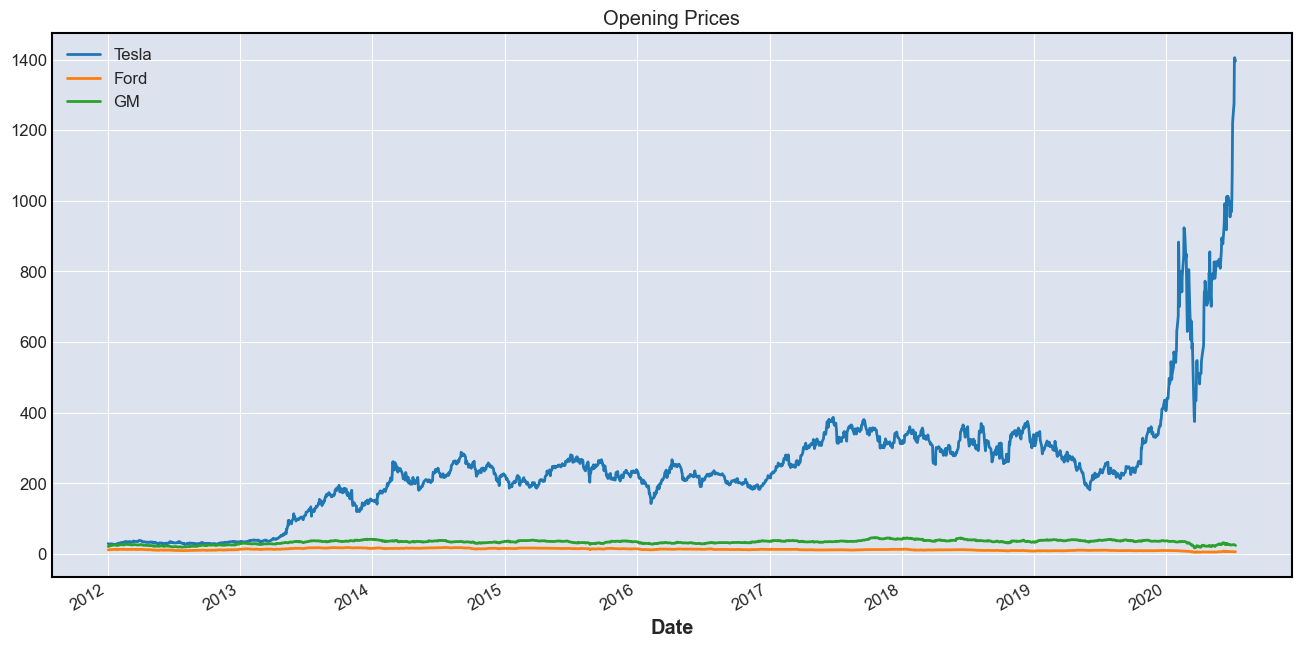

In [54]:
tesla['Open'].plot(label='Tesla', figsize=(16,8), title='Opening Prices')
ford['Open'].plot(label='Ford', figsize=(16,8))
gm['Open'].plot(label='GM', figsize=(16,8))
plt.legend();

### Daily Trading Volume

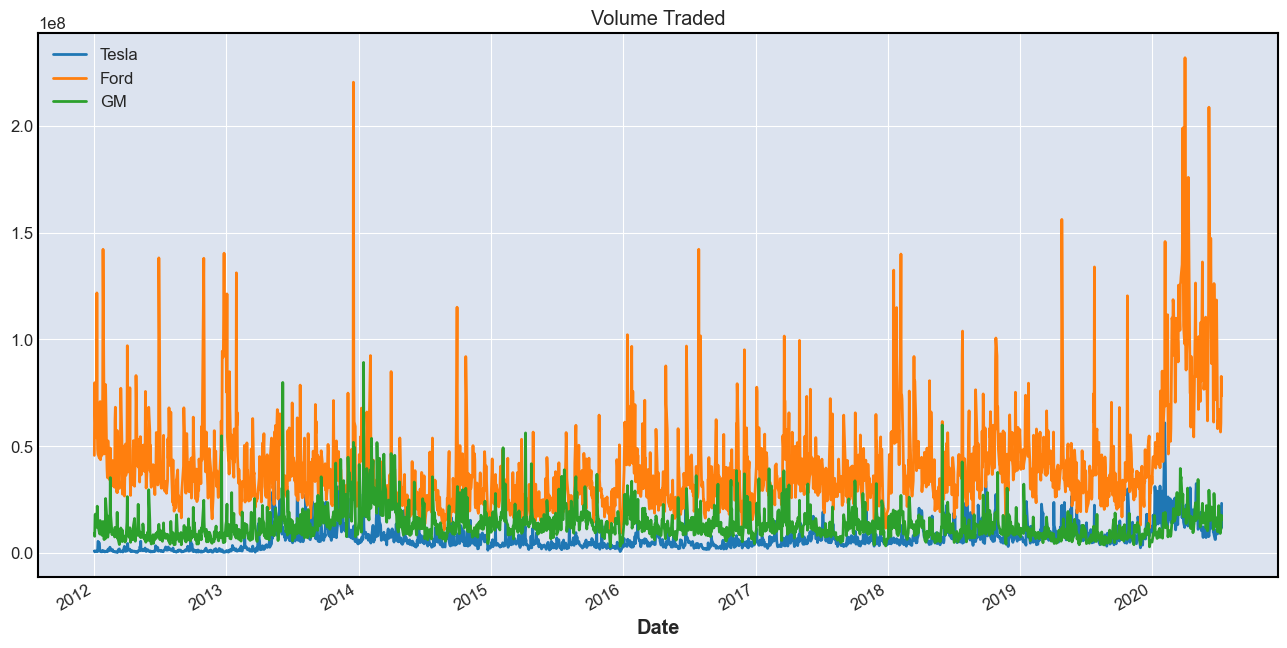

In [55]:
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volume Traded')
ford['Volume'].plot(label='Ford', figsize=(16,8))
gm['Volume'].plot(label='GM', figsize=(16,8))
plt.legend();

### Moving Averages for Tesla
#### MA indicates the closing price

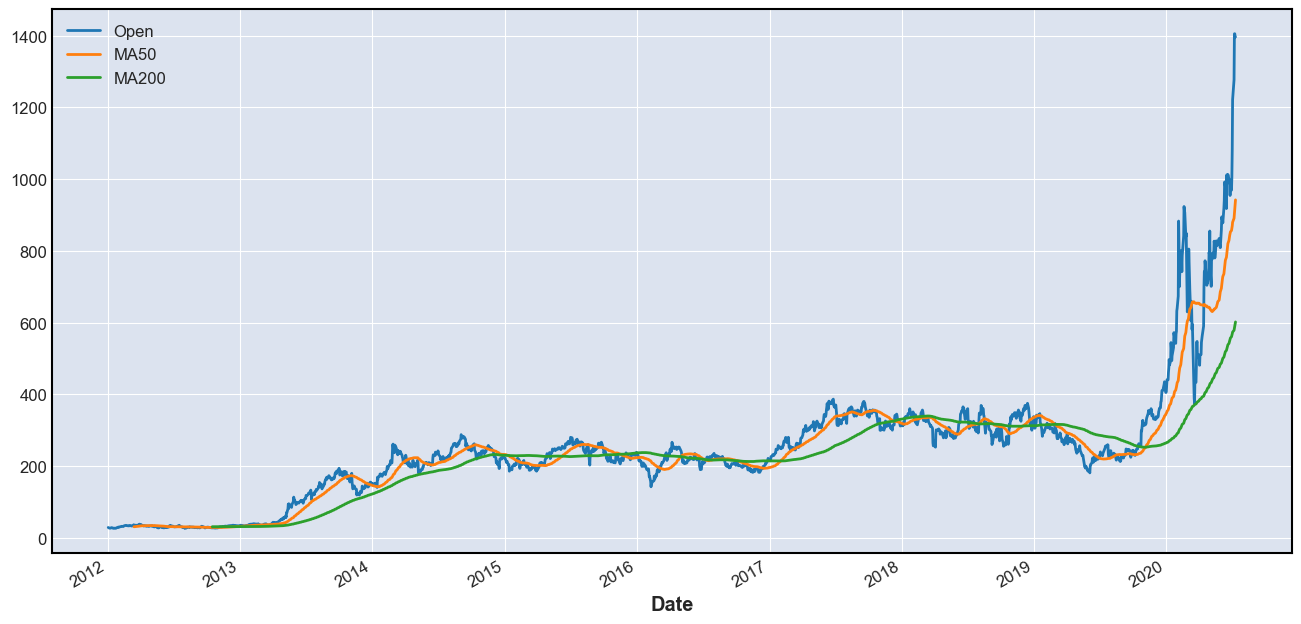

In [56]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open', 'MA50', 'MA200']].plot(figsize=(16,8));

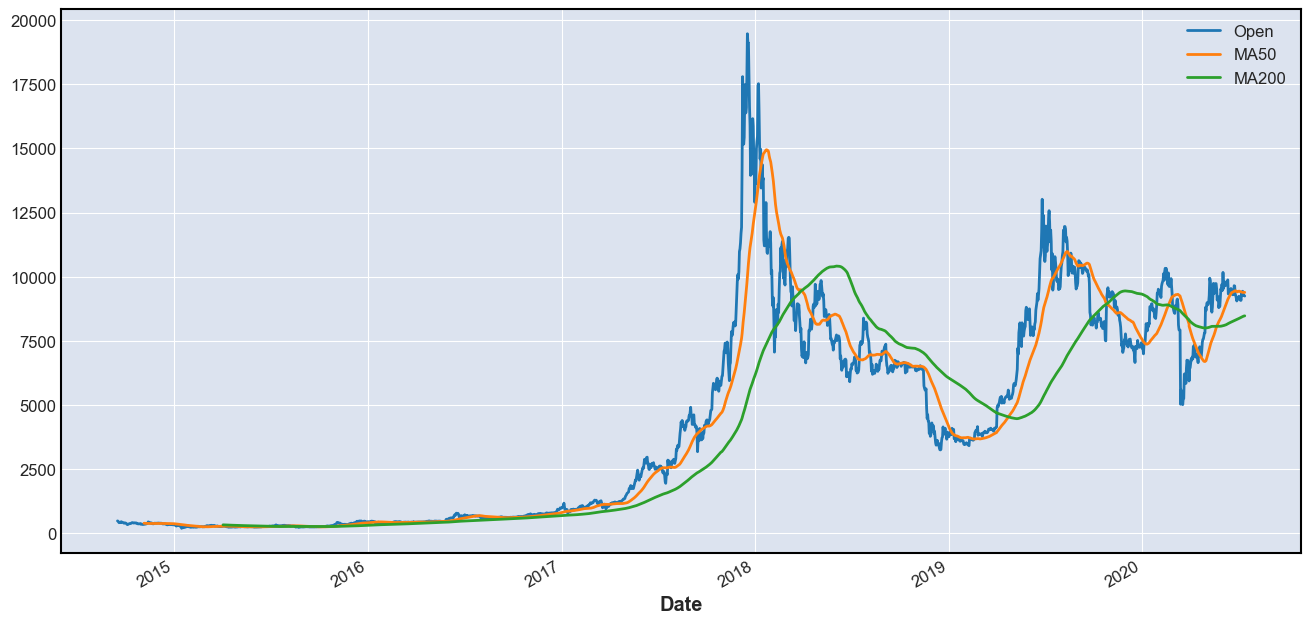

In [57]:
### Bitcion
btc['MA50'] = btc['Open'].rolling(50).mean()
btc['MA200'] = btc['Open'].rolling(200).mean()
btc[['Open', 'MA50', 'MA200']].plot(figsize=(16,8));

In [58]:
### Plotting relationship between the Car Stocks
from pandas.plotting import scatter_matrix

cars = pd.concat([tesla['Open'], ford['Open'], gm['Open']], axis=1)
cars.columns = ['Tesla Open', 'Ford Open', 'GM Open']
cars.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2012-01-03,28.940001,11.00,20.830000
2012-01-04,28.209999,11.15,21.049999
2012-01-05,27.760000,11.33,21.100000
2012-01-06,27.200001,11.74,22.260000
2012-01-09,27.000000,11.83,23.200001


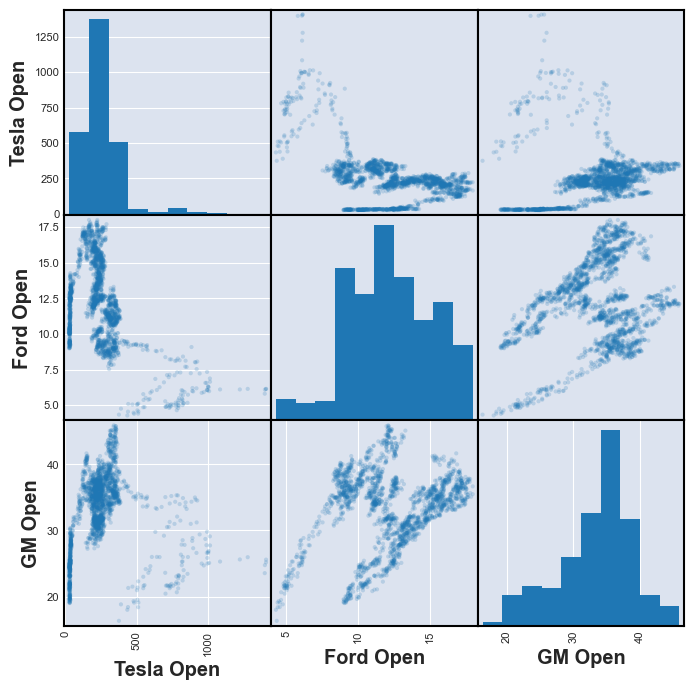

In [59]:
scatter_matrix(cars, figsize=(8,8), alpha=0.2);


### Tesla Candle Stick Chart  For  2020

In [60]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [61]:
tesla_reset = tesla.loc['2020-01':].reset_index()
list_of_cols = ['Date', 'Open', 'High', 'Low', 'Close']
tesla_values = [tuple(vals) for vals in tesla_reset[list_of_cols].values]

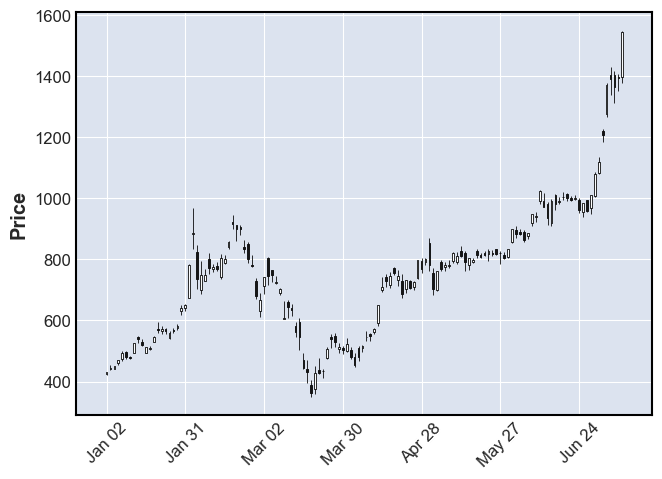

In [62]:
tesla_df = pd.DataFrame(tesla_values, columns=list_of_cols)
tesla_df.set_index('Date', inplace=True)
mpf.plot(tesla_df,type='candle')

### Percent Change


In [93]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)
btc['returns'] = btc['Close'].pct_change(1)

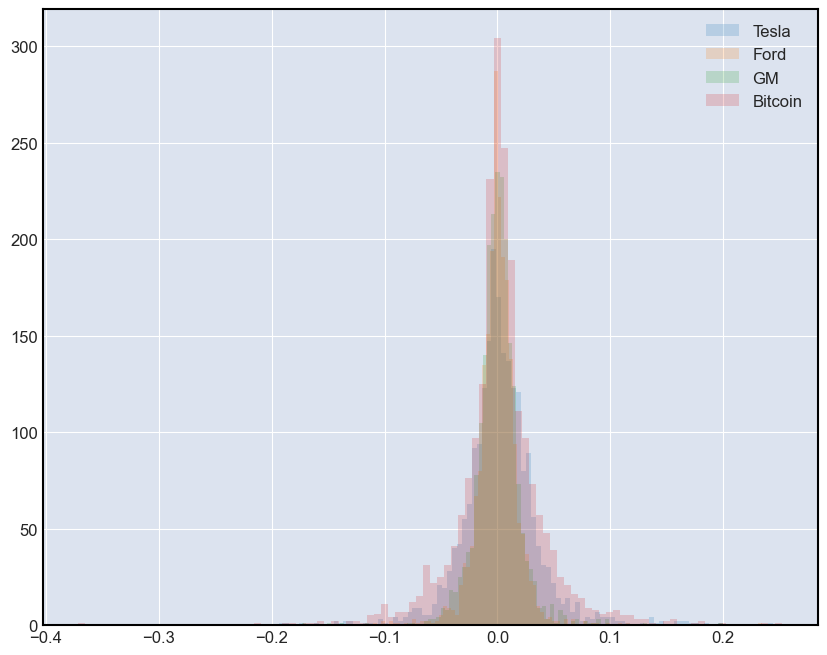

In [94]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(10,8), alpha=0.2);
ford['returns'].hist(bins=100, label='Ford', figsize=(10,8), alpha=0.2);
gm['returns'].hist(bins=100, label='GM', figsize=(10,8), alpha=0.2);
btc['returns'].hist(bins=100, label='Bitcoin', figsize=(10,8), alpha=0.2);
plt.legend();

### Box plot Compaing returns

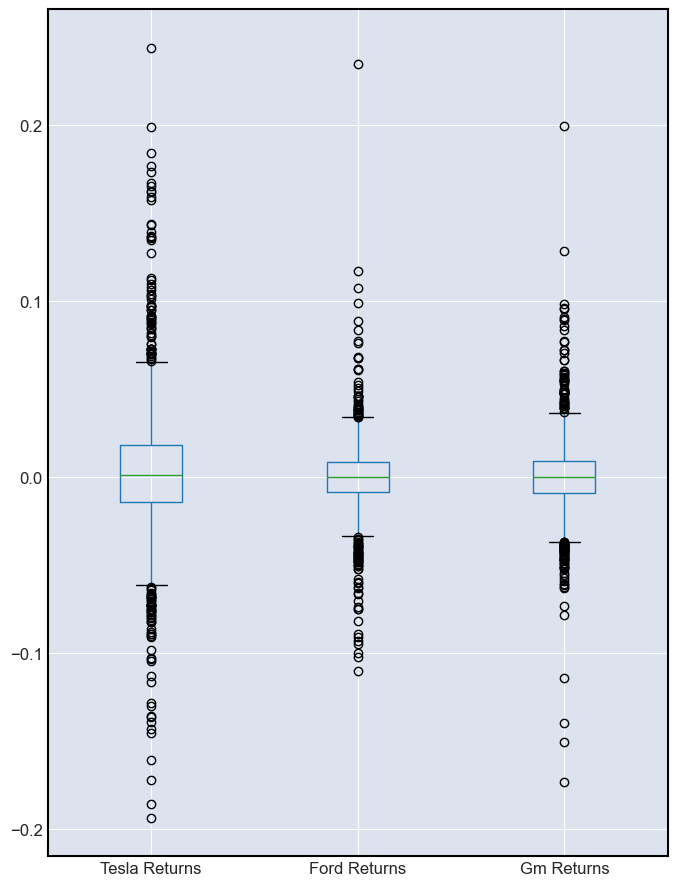

In [92]:
box_df = pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'Gm Returns']
box_df.plot(kind='box', figsize=(8,11));

### Compaing Daily Returns between stocks

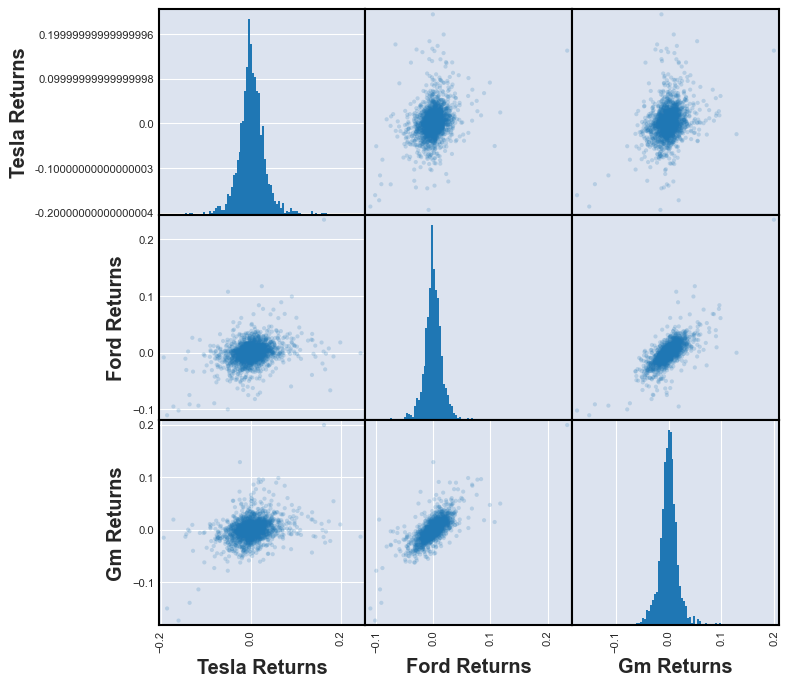

In [66]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.2, hist_kwds={'bins': 100});

### Cumulative Return
aggregate amount an investment has gained or lost over time

In [69]:
tesla['Cumulative Return'] = ( 1 + tesla['returns']).cumprod()

In [72]:
ford['Cumulative Return'] = ( 1 + ford['returns']).cumprod()
gm['Cumulative Return'] = ( 1 + gm['returns']).cumprod()

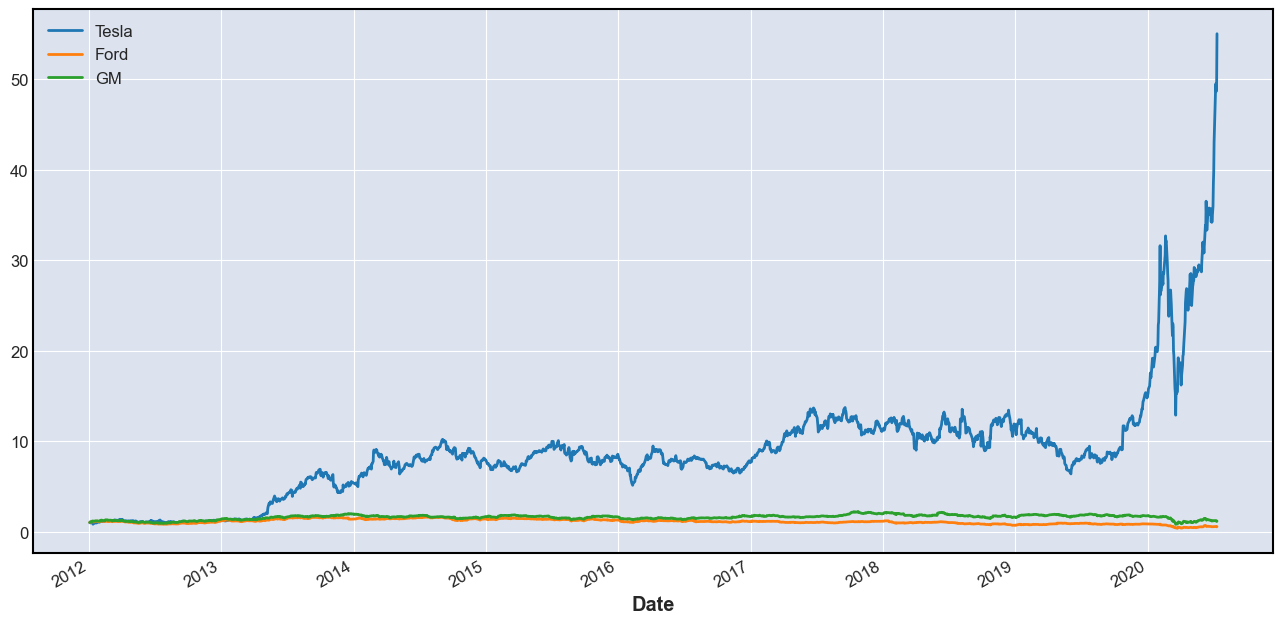

In [75]:
tesla['Cumulative Return'].plot(label='Tesla', figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford', figsize=(16,8))
gm['Cumulative Return'].plot(label='GM', figsize=(16,8))
plt.legend();

In [95]:
btc['Cumulative Return'] = ( 1 + btc['returns']).cumprod()

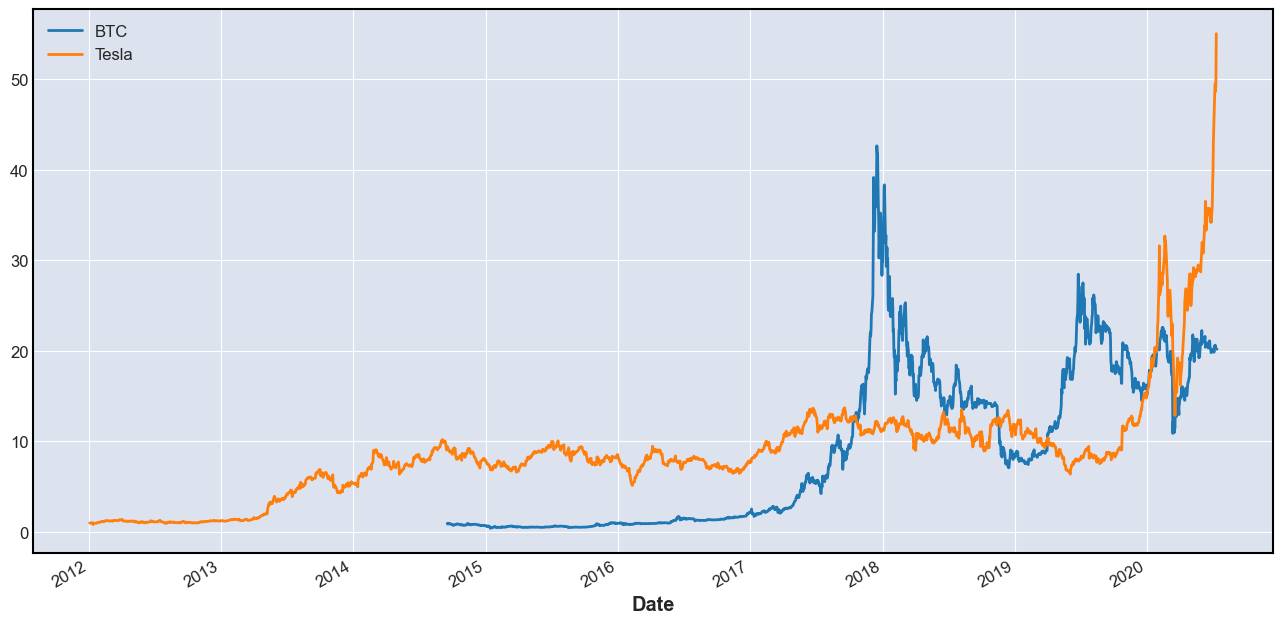

In [98]:
btc['Cumulative Return'].plot(label='BTC', figsize=(16,8));
tesla['Cumulative Return'].plot(label='Tesla', figsize=(16,8));
plt.legend();